# COGS 108 - Data Checkpoint

# Names

- Xinhao Zhao
- Kunhao Song
- Zirui Lin
- Shiyuan Wang

<a id='research_question'></a>
# Research Question

Utilizing the Glassdoor jobs dataset, which factors exert the most considerable influence on software developers' salary levels, and to what degree does each factor affect these salary levels? We will meticulously examine variables such as job title, company rating, company size, location (city), and industry to systematically ascertain their respective impacts on software developers' salaries within the context of the provided dataset.



# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name: Salary Prediction
- Link to the dataset: https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor 
- Number of observations: 743 rows

The "Jobs from Glassdoor dataset" is a dataset consisting of job-related information scraped from the Glassdoor website. It includes various data points such as job title, company name, salary range, and job description. This dataset may be useful in conducting job market analysis, wage forecasting, and other similar studies, just as it is valuable to our research.

# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Data Cleaning

Describe your data cleaning steps here.

Some important columns:

**Job Title**: different job positions in data science fields.

**Salary Estimate**: the range of estimated salaries.

**Location**: the locations of companies.

**Size**: size of the companies.

**min_salary**: the minimum salary.

**max_salary**: the maximum salary.

**avg_salary**: the average salary.

**age**: the age of the person.

**python_yn**: whether the person looking at the job knows Python.

**R_yn**: whether the person looking at the job knows R.

**spark**: whether the person looking at the job knows Spark.

**aws**: whether the person looking at the job knows AWS.

**excel**: whether the person looking at the job knows Excel.


In [ ]:
#read in the file
salary = pd.read_csv("https://github.com/XinhaoZhao/COGS108_Repo/blob/main/eda_data.csv?raw=true")
salary.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [ ]:
#Check each column data type to make sure the type of numerical columns are float64 or int64, the rest columns are object type.
salary.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

To facilitate the post-processing of the data we split the data in the contents of the Salary Estimate string into two columns, Lowest and Highest, and fill them with data of type numerical

In [ ]:
# Extract the data from the "Salary Estimate" column
salary_estimate = salary['Salary Estimate']

# Use regular expressions to extract the lowest and highest estimate values
salary['Lowest Estimate (k$)'] = salary_estimate.str.extract(r'\$(\d+\.?\d*)[Kk]-\$(\d+\.?\d*)[Kk]').iloc[:, 0]
salary['Highest Estimate (k$)'] = salary_estimate.str.extract(r'\$(\d+\.?\d*)[Kk]-\$(\d+\.?\d*)[Kk]').iloc[:, 1]

# Convert the extracted values to numeric type
salary['Lowest Estimate (k$)'] = pd.to_numeric(salary['Lowest Estimate (k$)'])
salary['Highest Estimate (k$)'] = pd.to_numeric(salary['Highest Estimate (k$)'])

# Drop the "Salary Estimate" column
salary.drop('Salary Estimate', axis=1, inplace=True)

# Display the "Lowest Estimate (k$)" and "Highest Estimate (k$)" columns
print(salary[['Lowest Estimate (k$)', 'Highest Estimate (k$)']])


     Lowest Estimate (k$)  Highest Estimate (k$)
0                    53.0                   91.0
1                    63.0                  112.0
2                    80.0                   90.0
3                    56.0                   97.0
4                    86.0                  143.0
..                    ...                    ...
737                  58.0                  111.0
738                  72.0                  133.0
739                  56.0                   91.0
740                  95.0                  160.0
741                  61.0                  126.0

[742 rows x 2 columns]


In [ ]:
salary.head()

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp,Lowest Estimate (k$),Highest Estimate (k$)
0,0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,1,data scientist,na,2536,0,53.0,91.0
1,1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,0,data scientist,na,4783,0,63.0,112.0
2,2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,1,0,1,data scientist,na,3461,0,80.0,90.0
3,3,Data Scientist,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,data scientist,na,3883,3,56.0,97.0
4,4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,0,0,1,data scientist,na,2728,3,86.0,143.0


In [ ]:
#Check if there is any missing value in the dataset
salary.isnull().any().any()

True

In [ ]:
#Check if there is any duplicates in the dataset
salary.duplicated().any()

False

In [ ]:
#Drop unwanted columns
salary = salary.drop(["Job Description", "Headquarters", "Unnamed: 0"], axis = 1)
salary.head()

,Job Title,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,...,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp,Lowest Estimate (k$),Highest Estimate (k$)
0,Data Scientist,3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),...,0,0,0,1,data scientist,na,2536,0,53.0,91.0
1,Healthcare Data Scientist,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),...,0,0,0,0,data scientist,na,4783,0,63.0,112.0
2,Data Scientist,4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),...,0,1,0,1,data scientist,na,3461,0,80.0,90.0
3,Data Scientist,3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),...,0,0,0,0,data scientist,na,3883,3,56.0,97.0
4,Data Scientist,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,...,0,0,0,1,data scientist,na,2728,3,86.0,143.0


In [12]:
#delete extreme outlier values in these three columns: rating," "founded," and "age"
salary = salary[(salary['Rating'] != -1) & (salary['Founded'] != -1) & (salary['age'] != -1)]
#filter the ages column to include only ages greater than 18 and less than 60
salary = salary[(salary['age'] > 18) & (salary['age'] < 60)]
#change the column same_state to use true and false instead of 0 and 1
salary['same_state'] = salary['same_state'].map({0: False, 1: True})
description = salary.describe().round(3)
description = description.drop('count')
description

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp,Lowest Estimate (k$),Highest Estimate (k$)
mean,3.602,1983.787,0.055,0.012,68.291,118.213,91.925,36.213,0.476,0.008,0.185,0.165,0.520,3802.594,1.094,69.933,121.833
std,0.570,12.229,0.229,0.108,26.754,44.779,37.386,12.229,0.500,0.089,0.389,0.372,0.501,1450.783,1.386,26.512,43.278
min,1.900,1961.000,0.000,0.000,15.000,16.000,13.500,19.000,0.000,0.000,0.000,0.000,0.000,879.000,0.000,15.000,16.000
25%,3.300,1973.000,0.000,0.000,49.000,85.000,66.500,24.000,0.000,0.000,0.000,0.000,0.000,2772.250,0.000,50.000,87.500
50%,3.600,1984.000,0.000,0.000,64.000,116.000,90.000,36.000,0.000,0.000,0.000,0.000,1.000,3718.500,0.000,66.500,119.000
75%,3.900,1996.000,0.000,0.000,85.000,146.000,114.500,47.000,1.000,0.000,0.000,0.000,1.000,4720.500,3.000,86.000,147.000
max,4.700,2001.000,1.000,1.000,176.000,289.000,232.500,59.000,1.000,1.000,1.000,1.000,1.000,9120.000,4.000,176.000,289.000


From the boxplot, we can see there are indeed some outliers. We want to eliminate the effect of significant outliers(unreasonably high/low salaries). According to the descriptive statistics, the salaries' max and min values are still in reasonable sense. 

We need to check if there are some erroneous entries. From the code above, the dataset does not have any missing data. Since the dataset has the columns min_salary, max_salary, and avg_salary, there should not be any data entry error(wrong data type, impossible data, etc.). We also find that there is no duplicate entry in our cleaned dataset. Hence, we could argue that our cleaned dataset has no erroneous entries.

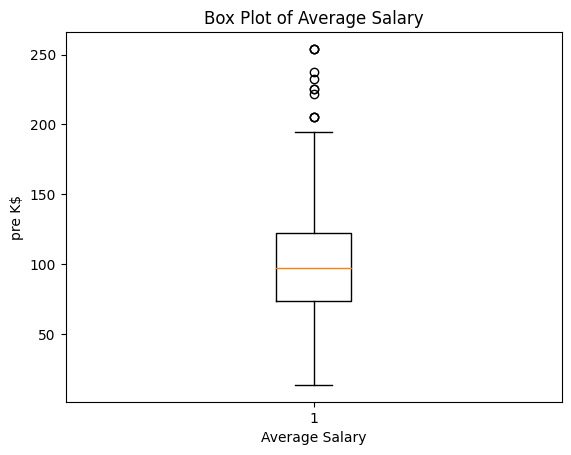

In [ ]:
plt.boxplot(salary['avg_salary'])
plt.title('Box Plot of Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('pre K$')
plt.show()